Hand-In of Group 13, Jonathan Ehrengruber (jonathan.ehrengruber@students.fhnw.ch), Christian Renold (christian.renold@hslu.ch)

In [1]:
import tensorflow as tf
import datetime
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
%load_ext tensorboard

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
def create_model(layersizes, drop_rate=0.0, dropout=False):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    Add for the hidden layer a dropout layer. Make sure that the dropout layer is applied after the affiine transformation and before the activation function.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    drop_rate -- the drop rate for dropout
    
    """
    ### START YOUR CODE HERE ###
    
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    model.add(Dense(units=layersizes[0], use_bias=True, activation='sigmoid', 
                        name='Layer_{}'.format(0)))
        
    for i, ls in enumerate(layersizes[1:-1]):        
        model.add(Dense(units=ls, use_bias=True, activation=None, 
                        name='Layer_{}'.format(i+1)))
        
        if dropout:
            model.add(Dropout(rate=drop_rate))
        model.add(Activation('sigmoid', name='Activation_Layer_{}'.format(i+1)))
    
    model.add(Dense(units=layersizes[-1], use_bias=True, activation='softmax',
                   name='Layer_{}'.format(len(layersizes)-1)))
    
    ### STOP YOUR CODE HERE ###

    return model

In [4]:
### START YOUR CODE HERE ###
# params
epochs=70
batchsize=32
learning_rate=1e-3
layersizes = [256, 128, 64, 32, 10]

# Reference Model
ref_model = create_model(layersizes)
ref_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Layer_0 (Dense)              (None, 256)               200960    
_________________________________________________________________
Layer_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
Activation_Layer_1 (Activati (None, 128)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
Activation_Layer_2 (Activati (None, 64)                0         
_________________________________________________________________
Layer_3 (Dense)              (None, 32)                2

In [5]:
# compile and fit reference model

ref_model.compile(optimizer="sgd",
              learning_rate=learning_rate,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

run_name = 'reference_model'
tensorboard_folder = "tb_logs_keras"
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
outdir = os.path.join(os.getcwd(), tensorboard_folder, current_time, run_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=outdir, histogram_freq=1, profile_batch=0)

history = ref_model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize,
          validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

### STOP YOUR CODE HERE ###

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3083 - accuracy: 0.1098 - val_loss: 2.3006 - val_accuracy: 0.1135
Epoch 2/70
60000/60000 [==============================] - 4s 68us/sample - loss: 2.3004 - accuracy: 0.1124 - val_loss: 2.2991 - val_accuracy: 0.1135
Epoch 3/70
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2989 - accuracy: 0.1148 - val_loss: 2.2979 - val_accuracy: 0.1135
Epoch 4/70
60000/60000 [==============================] - 4s 68us/sample - loss: 2.2972 - accuracy: 0.1190 - val_loss: 2.2961 - val_accuracy: 0.1136
Epoch 5/70
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2951 - accuracy: 0.1177 - val_loss: 2.2931 - val_accuracy: 0.1143
Epoch 6/70
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2918 - accuracy: 0.1362 - val_loss: 2.2888 - val_accuracy: 0.1135
Epoch 7/70
60000/60000 [==============================] 

60000/60000 [==============================] - 4s 67us/sample - loss: 0.2324 - accuracy: 0.9369 - val_loss: 0.2397 - val_accuracy: 0.9352
Epoch 56/70
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2269 - accuracy: 0.9374 - val_loss: 0.2346 - val_accuracy: 0.9352
Epoch 57/70
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2208 - accuracy: 0.9395 - val_loss: 0.2302 - val_accuracy: 0.9368
Epoch 58/70
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2156 - accuracy: 0.9407 - val_loss: 0.2274 - val_accuracy: 0.9368
Epoch 59/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2099 - accuracy: 0.9423 - val_loss: 0.2187 - val_accuracy: 0.9408
Epoch 60/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2044 - accuracy: 0.9440 - val_loss: 0.2151 - val_accuracy: 0.9414
Epoch 61/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1996 - accuracy: 0.9450 - va

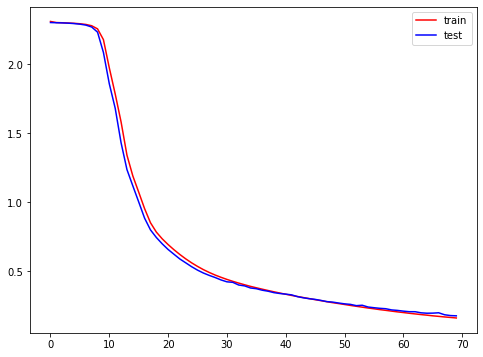

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = ax.plot(history.history['loss'], color='red', label='train')
_ = ax.plot(history.history['val_loss'], color='blue', label='test')
_ = ax.legend()

In [7]:
ref_model.evaluate(x_test, y_test, verbose=0)

[0.17579961233735084, 0.9535]

In [8]:
# Model with dropout
dropout_model = create_model(layersizes, drop_rate=0.5, dropout=True)
dropout_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Layer_0 (Dense)              (None, 256)               200960    
_________________________________________________________________
Layer_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
Activation_Layer_1 (Activati (None, 128)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [9]:
# compile and fit reference model

dropout_model.compile(optimizer="sgd",
              learning_rate=learning_rate,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

run_name = 'dropout_model'
tensorboard_folder = "tb_logs_keras"
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
outdir = os.path.join(os.getcwd(), tensorboard_folder, current_time, run_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=outdir, histogram_freq=1, profile_batch=0)

history = dropout_model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize,
          validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

### STOP YOUR CODE HERE ###

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3120 - accuracy: 0.1038 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/70
60000/60000 [==============================] - 4s 69us/sample - loss: 2.3054 - accuracy: 0.1064 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/70
60000/60000 [==============================] - 4s 69us/sample - loss: 2.3036 - accuracy: 0.1065 - val_loss: 2.2997 - val_accuracy: 0.1135
Epoch 4/70
60000/60000 [==============================] - 4s 69us/sample - loss: 2.3025 - accuracy: 0.1096 - val_loss: 2.2993 - val_accuracy: 0.1135
Epoch 5/70
60000/60000 [==============================] - 4s 69us/sample - loss: 2.3006 - accuracy: 0.1133 - val_loss: 2.2978 - val_accuracy: 0.1135
Epoch 6/70
60000/60000 [==============================] - 4s 69us/sample - loss: 2.2993 - accuracy: 0.1160 - val_loss: 2.2958 - val_accuracy: 0.1135
Epoch 7/70
60000/60000 [==============================] 

60000/60000 [==============================] - 4s 68us/sample - loss: 0.4960 - accuracy: 0.8711 - val_loss: 0.3513 - val_accuracy: 0.9102
Epoch 56/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4826 - accuracy: 0.8773 - val_loss: 0.3472 - val_accuracy: 0.9118
Epoch 57/70
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4728 - accuracy: 0.8784 - val_loss: 0.3318 - val_accuracy: 0.9163
Epoch 58/70
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4592 - accuracy: 0.8816 - val_loss: 0.3286 - val_accuracy: 0.9158
Epoch 59/70
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4500 - accuracy: 0.8855 - val_loss: 0.3210 - val_accuracy: 0.9193
Epoch 60/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4373 - accuracy: 0.8895 - val_loss: 0.3182 - val_accuracy: 0.9199
Epoch 61/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4303 - accuracy: 0.8924 - va

In [10]:
dropout_model.evaluate(x_test, y_test, verbose=0)

[0.26089215167984364, 0.9374]

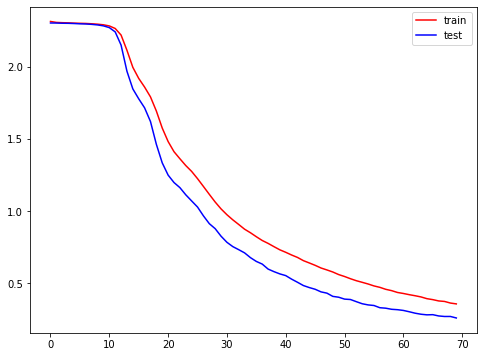

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = ax.plot(history.history['loss'], color='red', label='train')
_ = ax.plot(history.history['val_loss'], color='blue', label='test')
_ = ax.legend()

In [17]:
def learning_rate_decision(nepoch, current_lr):
    '''Learning rate controller'''
    lr = 1e-4
    if 0 <= nepoch <= 20:
        lr = 0.1
    elif 21 <= nepoch <= 40:
        lr = 0.05
    else:
        lr = 0.01
    print(lr)
    return lr

# Create learning rate scheduler
learning_rate_scheduler = LearningRateScheduler(learning_rate_decision)

In [18]:
flex_lr_model = create_model(layersizes, drop_rate=0.5, dropout=True)
flex_lr_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
Layer_0 (Dense)              (None, 256)               200960    
_________________________________________________________________
Layer_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
Activation_Layer_1 (Activati (None, 128)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [19]:

### STOP YOUR CODE HERE ###
run_name = 'dropout_flexible_lr_model'
tensorboard_folder = "tb_logs_keras"
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
outdir = os.path.join(os.getcwd(), tensorboard_folder, current_time, run_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=outdir, histogram_freq=1, profile_batch=0)


flex_lr_model.compile(optimizer="sgd", 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [20]:
history = flex_lr_model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize,
          validation_data=(x_test, y_test), 
          callbacks=[learning_rate_scheduler, tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
0.1
Epoch 1/70
60000/60000 [==============================] - 5s 75us/sample - loss: 2.3071 - accuracy: 0.1111 - val_loss: 2.2832 - val_accuracy: 0.1103
0.1
Epoch 2/70
60000/60000 [==============================] - 4s 67us/sample - loss: 1.9178 - accuracy: 0.2906 - val_loss: 1.4746 - val_accuracy: 0.3835
0.1
Epoch 3/70
60000/60000 [==============================] - 4s 67us/sample - loss: 1.2304 - accuracy: 0.5584 - val_loss: 0.8545 - val_accuracy: 0.7026
0.1
Epoch 4/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.9103 - accuracy: 0.6993 - val_loss: 0.8032 - val_accuracy: 0.7459
0.1
Epoch 5/70
60000/60000 [==============================] - 4s 69us/sample - loss: 0.7702 - accuracy: 0.7658 - val_loss: 0.6461 - val_accuracy: 0.8173
0.1
Epoch 6/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6291 - accuracy: 0.8264 - val_loss: 0.4676 - val_accuracy: 0.8894
0.1
Epoch 7/70
60000/60000 [====

0.01
Epoch 54/70
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0587 - accuracy: 0.9886 - val_loss: 0.1819 - val_accuracy: 0.9747
0.01
Epoch 55/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0579 - accuracy: 0.9885 - val_loss: 0.1826 - val_accuracy: 0.9738
0.01
Epoch 56/70
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0581 - accuracy: 0.9887 - val_loss: 0.1791 - val_accuracy: 0.9740
0.01
Epoch 57/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0571 - accuracy: 0.9883 - val_loss: 0.1797 - val_accuracy: 0.9737
0.01
Epoch 58/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0592 - accuracy: 0.9881 - val_loss: 0.1829 - val_accuracy: 0.9734
0.01
Epoch 59/70
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0578 - accuracy: 0.9883 - val_loss: 0.1818 - val_accuracy: 0.9742
0.01
Epoch 60/70
60000/60000 [==============================] - 4s 73u

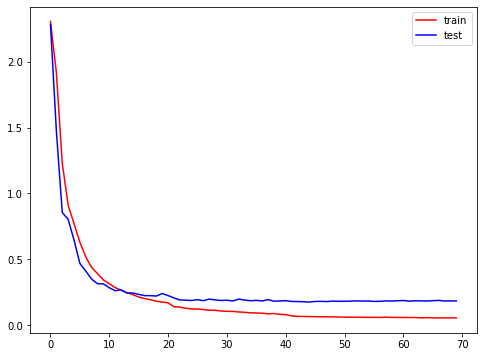

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = ax.plot(history.history['loss'], color='red', label='train')
_ = ax.plot(history.history['val_loss'], color='blue', label='test')
_ = ax.legend()

In [38]:
### START YOUR CODE HERE ###

layersizes = [256, 128, 64, 32, 10]

epochs = 70
batchsize = 32
lr = 1e-4
drop_rate = 0.5
run_name = "with_dropout"



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
Layer_0 (Dense)              (None, 256)               200960    
_________________________________________________________________
Layer_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
Layer_3 (Dense)              (None, 32)              

Train on 60000 samples, validate on 10000 samples
0.1
Epoch 1/70
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3027 - accuracy: 0.1083 - val_loss: 2.3020 - val_accuracy: 0.0958
0.1
Epoch 2/70
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3026 - accuracy: 0.1073 - val_loss: 2.3008 - val_accuracy: 0.1135
0.1
Epoch 3/70
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3021 - accuracy: 0.1108 - val_loss: 2.3010 - val_accuracy: 0.1135
0.1
Epoch 4/70
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3007 - val_accuracy: 0.1028
0.1
Epoch 5/70
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3017 - accuracy: 0.1101 - val_loss: 2.3009 - val_accuracy: 0.1028
0.1
Epoch 6/70
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3012 - accuracy: 0.1129 - val_loss: 2.2989 - val_accuracy: 0.1135
0.1
Epoch 7/70
60000/60000 [====

0.01
Epoch 54/70
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3471 - accuracy: 0.9093 - val_loss: 0.2349 - val_accuracy: 0.9526
0.01
Epoch 55/70
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3484 - accuracy: 0.9087 - val_loss: 0.2338 - val_accuracy: 0.9533
0.01
Epoch 56/70
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3395 - accuracy: 0.9122 - val_loss: 0.2314 - val_accuracy: 0.9539
0.01
Epoch 57/70
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3416 - accuracy: 0.9109 - val_loss: 0.2327 - val_accuracy: 0.9534
0.01
Epoch 58/70
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3399 - accuracy: 0.9118 - val_loss: 0.2311 - val_accuracy: 0.9538
0.01
Epoch 59/70
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3364 - accuracy: 0.9124 - val_loss: 0.2305 - val_accuracy: 0.9534
0.01
Epoch 60/70
60000/60000 [==============================] - 4s 70u